In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [4]:
#csv파일을 읽어온다
df = pd.read_csv('iris.csv')
df.head(10)

,caseno,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [24]:
X = df.iloc[:, 1:3]
y = df[['Species']]
y = y.Species.replace({'setosa' : 0, 'virginica' : 1, 'versicolor' : 2})
X.head(10)

,SepalLength,SepalWidth
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


0.7333333333333333
setosa
    SepalLength  SepalWidth Species
22          4.6         3.6  setosa
44          5.1         3.8  setosa
26          5.0         3.4  setosa
18          5.7         3.8  setosa
2           4.7         3.2  setosa
43          5.0         3.5  setosa
versicolor
    SepalLength  SepalWidth     Species
40          5.0         3.5  versicolor
8           4.4         2.9  versicolor
virginica
    SepalLength  SepalWidth    Species
33          5.5         4.2  virginica
7           5.0         3.4  virginica
37          4.9         3.6  virginica
16          5.4         3.9  virginica
24          4.8         3.4  virginica
27          5.2         3.5  virginica
10          5.4         3.7  virginica


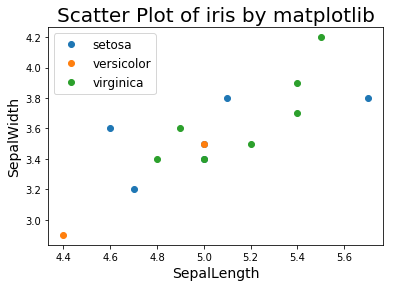

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
kr_y = pd.DataFrame(y_pred, columns = ["Species"])
knn_result = pd.merge(pd.DataFrame(X_test), kr_y, left_index = True, right_index = True)
knn_result.Species.replace({0:'setosa', 1:'virginica',2:'versicolor'}, inplace=True)

groups = knn_result.groupby('Species')

fig, ax = plt.subplots()

for name, group in groups:
    
    print(name)
    print(group)

    ax.plot(group.SepalLength, 

            group.SepalWidth, 

            marker='o', 

            linestyle='',

            label=name)
    
ax.legend(fontsize=12, loc='upper left') # legend position

plt.title('Scatter Plot of iris by matplotlib', fontsize=20)

plt.xlabel('SepalLength', fontsize=14)

plt.ylabel('SepalWidth', fontsize=14)

plt.show()
    

[0.6666666666666666, 0.6444444444444445, 0.7333333333333333, 0.7111111111111111, 0.7333333333333333, 0.6888888888888889, 0.7555555555555555, 0.7555555555555555, 0.7333333333333333, 0.7333333333333333, 0.7111111111111111, 0.7333333333333333, 0.7555555555555555, 0.7555555555555555, 0.7777777777777778, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.8, 0.7555555555555555, 0.7555555555555555, 0.7777777777777778, 0.7333333333333333]


Text(0, 0.5, 'Testing Accuracy')

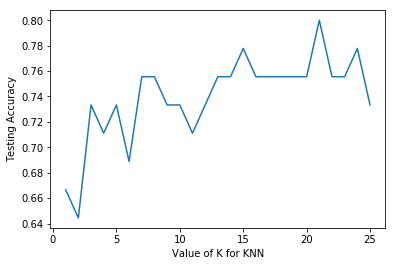

In [21]:
k_range = range(1, 26)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
print(scores)

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')